In [1]:
%pip install pandas numpy matplotlib seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.1.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


                                              0.0/11.3 MB ? eta -:--:--
                                              0.0/11.3 MB ? eta -:--:--
                                              0.0/11.3 MB ? eta -:--:--
                                              0.1/11.3 MB 1.1 MB/s eta 0:00:11
                                              0.1/11.3 MB 1.1 MB/s eta 0:00:11
                                              0.2/11.3 MB 1.1 MB/s eta 0:00:11
                                              0.2/11.3 MB 1.1 MB/s eta 0:00:11
     -                                        0.4/11.3 MB 1.1 MB/s eta 0:00:10
     -                                        0.4/11.3 MB 1.1 MB/s eta 0:00:10
     -                                        0.5/11.3 MB 1.1 MB/s eta 0:00:11
     -                                        0.6/11.3 MB 1.2 MB/s eta 0:00:09
     --                                       0.7/11.3 MB 1.4 MB/s eta 0:00:08
     --                                       0.7/11.3 MB 1.3 MB/s eta 0:

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
sns.set(style="whitegrid")

In [5]:
df=pd.read_csv("AIML Dataset.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [9]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [10]:
df["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [12]:
df.isnull().sum().sum()

np.int64(0)

In [13]:
df.shape

(6362620, 11)

In [15]:
round((df["isFraud"].value_counts()[1]/df.shape[0])*100,2)

np.float64(0.13)

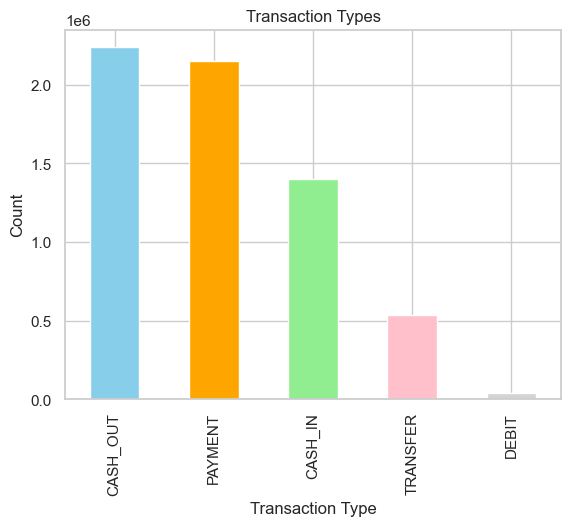

In [16]:
df["type"].value_counts().plot(kind="bar",title="Transaction Types",color=["skyblue","orange","lightgreen","pink","lightgrey","violet"])
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

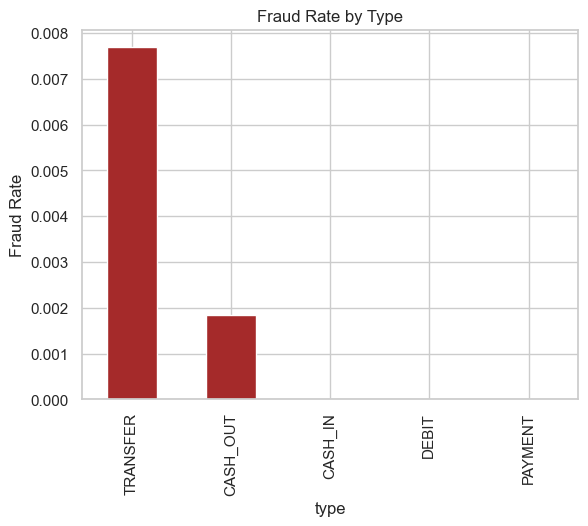

In [18]:
fraud_by_type=df.groupby("type")["isFraud"].mean().sort_values(ascending=False)
fraud_by_type.plot(kind="bar",title="Fraud Rate by Type",color="brown")
plt.ylabel("Fraud Rate")
plt.show()

In [20]:
df["amount"].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

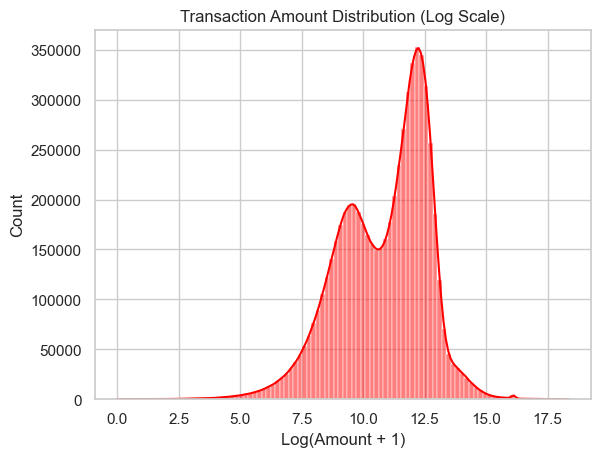

In [21]:
sns.histplot(np.log1p(df["amount"]),bins=100,kde=True,color="red")
plt.title("Transaction Amount Distribution (Log Scale)")
plt.xlabel("Log(Amount + 1)")
plt.show()

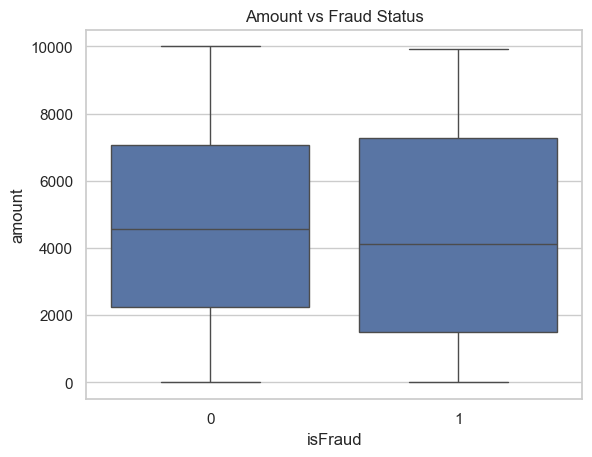

In [22]:
sns.boxplot(data=df[df["amount"]<10000],x="isFraud",y="amount")
plt.title("Amount vs Fraud Status")
plt.show()

In [23]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [24]:
df["balanceDiffOrig"]=df["oldbalanceOrg"]-df["newbalanceOrig"]
df["balanceDiffDest"]=df["oldbalanceDest"]-df["newbalanceDest"]

In [27]:
(df["balanceDiffOrig"]<0).sum()

np.int64(1399253)

In [28]:
(df["balanceDiffDest"]<0).sum()

np.int64(2806464)

In [29]:
df.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0


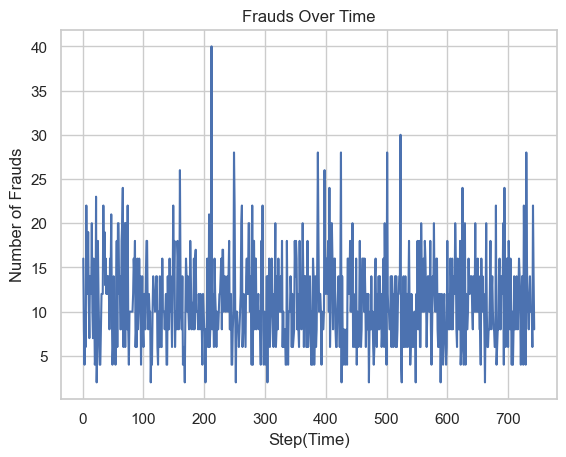

In [31]:
frauds_per_step=df[df["isFraud"]==1]["step"].value_counts().sort_index()
plt.plot(frauds_per_step.index, frauds_per_step.values, label="Frauds per step")
plt.xlabel("Step(Time)")
plt.ylabel("Number of Frauds")
plt.title("Frauds Over Time")
plt.grid(True)
plt.show()

In [32]:
df.drop(columns="step",inplace=True)

In [33]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [34]:
top_senders=df["nameOrig"].value_counts().head(10)

In [35]:
top_senders

nameOrig
C1677795071    3
C1999539787    3
C724452879     3
C1976208114    3
C400299098     3
C1784010646    3
C1530544995    3
C1065307291    3
C545315117     3
C1902386530    3
Name: count, dtype: int64

In [36]:
top_receivers=df["nameDest"].value_counts().head(10)

In [37]:
top_senders

nameOrig
C1677795071    3
C1999539787    3
C724452879     3
C1976208114    3
C400299098     3
C1784010646    3
C1530544995    3
C1065307291    3
C545315117     3
C1902386530    3
Name: count, dtype: int64

In [40]:
fraud_users=df[df["isFraud"]==1]["nameOrig"].value_counts().head(10)

In [41]:
fraud_users

nameOrig
C1305486145    1
C840083671     1
C1420196421    1
C2101527076    1
C137533655     1
C1118430673    1
C749981943     1
C1334405552    1
C467632528     1
C1364127192    1
Name: count, dtype: int64

In [42]:
fraud_types=df[df["type"].isin(["TRANSFER","CASH_OUT"])]

In [44]:
fraud_types["type"].value_counts()

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

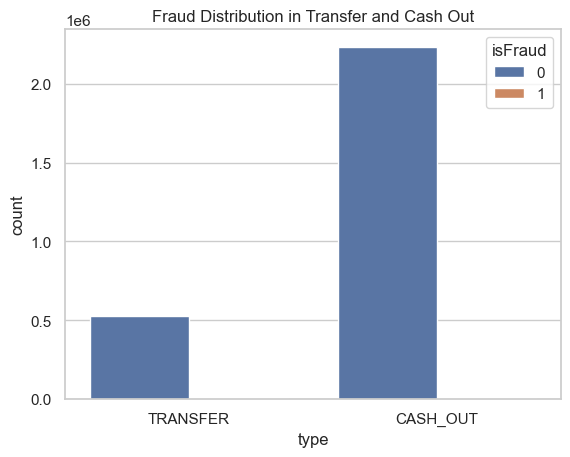

In [45]:
sns.countplot(data=fraud_types,x="type",hue="isFraud")
plt.title("Fraud Distribution in Transfer and Cash Out")
plt.show()

In [46]:
corr=df[["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest","balanceDiffOrig","balanceDiffDest","isFraud"]].corr()

In [47]:
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,balanceDiffOrig,balanceDiffDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.102337,-0.845964,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,-0.220297,0.087032,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.267750,0.094456,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.047460,-0.232316,-0.005885
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,-0.006451,-0.436191,0.000535
balanceDiffOrig,0.102337,-0.220297,-0.267750,-0.047460,-0.006451,1.000000,-0.169292,0.362472
balanceDiffDest,-0.845964,0.087032,0.094456,-0.232316,-0.436191,-0.169292,1.000000,-0.027028
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,0.362472,-0.027028,1.000000


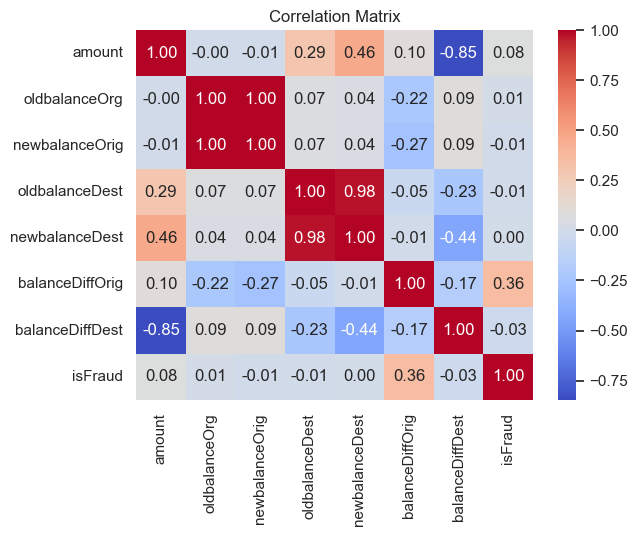

In [50]:
sns.heatmap(corr,annot=True,cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [51]:
zero_after_transfer=df[
    (df["oldbalanceOrg"]>0) &
    (df["newbalanceOrig"]==0) & 
    (df["type"].isin(["TRANSFER","CASH_OUT"]))
]

In [52]:
len(zero_after_transfer)

1188074

In [53]:
zero_after_transfer.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.0,0.00
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,181.0,21182.00
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,15325.0,-46430.44
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,705.0,22425.00
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,10835.0,-2712905.89


In [54]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [57]:
%pip install scikit-learn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

                                              0.0/8.9 MB ? eta -:--:--
                                              0.0/8.9 MB ? eta -:--:--
                                              0.1/8.9 MB 825.8 kB/s eta 0:00:11
                                              0.1/8.9 MB 825.8 kB/s eta 0:00:11
                                              0.1/8.9 MB 825.8 kB/s eta 0:00:11
                                              0.2/8.9 MB 807.1 kB/s eta 0:00:11
     -                                        0.3/8.9 MB 1.1 MB/s eta 0:00:08
     -                                        0.3/8.9 MB 1.1 MB/s eta 0:00:08
     --                                       0.6/8.9 MB 1.6 MB/s eta 0:00:06
     --                                       0.6/8.9 MB 1.6 MB/s eta 0:00:06
     --                                       0.6/8.9 MB 1.6 MB/s eta 0:00:06
     --                                       0.6/8.9 MB 1.2 MB/s eta 0:00:07
     --                                       0.6/8.9 MB 1.2 MB/s eta 


[notice] A new release of pip is available: 23.1.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [58]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [59]:
df_model=df.drop(["nameOrig","nameDest","isFlaggedFraud"],axis=1)

In [65]:
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


In [66]:
categorical = ["type"]
numeric=["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest","balanceDiffOrig","balanceDiffDest"]

In [67]:
y=df_model["isFraud"]
X=df_model.drop("isFraud",axis=1)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [69]:
Preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric),
        ('cat', OneHotEncoder(drop="first"), categorical)
    ],
    remainder="drop"
    )

In [70]:
pipeline = Pipeline([
    ("prep", Preprocessor),
    ("clf", LogisticRegression(class_weight="balanced", max_iter=1000))
    ])

In [71]:
pipeline.fit(X_train, y_train)

,steps,"[('prep', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [72]:
y_pred=pipeline.predict(X_test)

In [73]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      0.95      0.97   1270881\n           1       0.02      0.94      0.04      1643\n\n    accuracy                           0.95   1272524\n   macro avg       0.51      0.95      0.51   1272524\nweighted avg       1.00      0.95      0.97   1272524\n'

In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1270881
           1       0.02      0.94      0.04      1643

    accuracy                           0.95   1272524
   macro avg       0.51      0.95      0.51   1272524
weighted avg       1.00      0.95      0.97   1272524



In [75]:
confusion_matrix(y_test, y_pred)

array([[1203137,   67744],
       [     93,    1550]])

In [76]:
pipeline.score(X_test, y_test)

0.9466909857888731

In [77]:
import joblib
joblib.dump(pipeline, "fraud_detection_model.pkl")

['fraud_detection_model.pkl']